# Matplotlib图鉴——基础饼图

## 公众号：可视化图鉴

In [89]:
import matplotlib
print(matplotlib.__version__) #查看Matplotlib版本
import pandas as pd
print(pd.__version__) #查看pandas版本
import numpy as np
print(np.__version__) #查看numpy版本
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['STHeiti']  #设置中文

3.3.2
1.2.0
1.19.2


注意，代码在以下环境全部通过测试:
- Python 3.7.1
- Matplotlib == 3.3.2
- pandas == 1.2.0
- numpy == 1.19.2

因版本不同，可能会有部分语法差异，如有报错，请先检查拼写及版本是否一致！

### 饼图（甜甜圈图）- 增加白色块

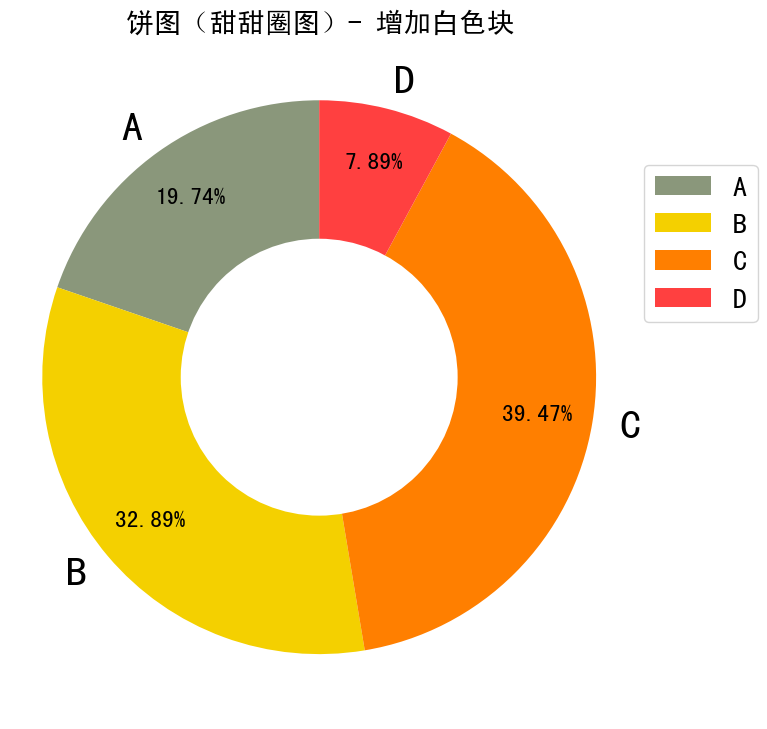

In [2]:
#-*- coding: utf-8 -*-
import matplotlib.pyplot as plt

plt.figure(figsize=(8,9),dpi = 100)  
sizes = [150,250,300,60]
labels = ['A','B','C','D'] 
colors = ['#8A977B','#F4D000','#FF7F00','#FF4040']
patches,l_text,p_text = plt.pie(sizes,labels = labels,
                      colors=colors,
                      autopct = '%3.2f%%', 
                      startangle = 90,
                      pctdistance = 0.8       
                      ) 

centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.legend(patches, labels,
          loc="center left",
          bbox_to_anchor=(1, 0.2, 1, 1),
          fontsize=20)


for t in l_text:
    t.set_size(30)
for t in p_text:
    t.set_size(17)


plt.title("饼图（甜甜圈图）- 增加白色块",fontsize = 20) 

plt.axis('equal')

plt.show()


### 饼图（甜甜圈图）修改颜色和改变标签位置

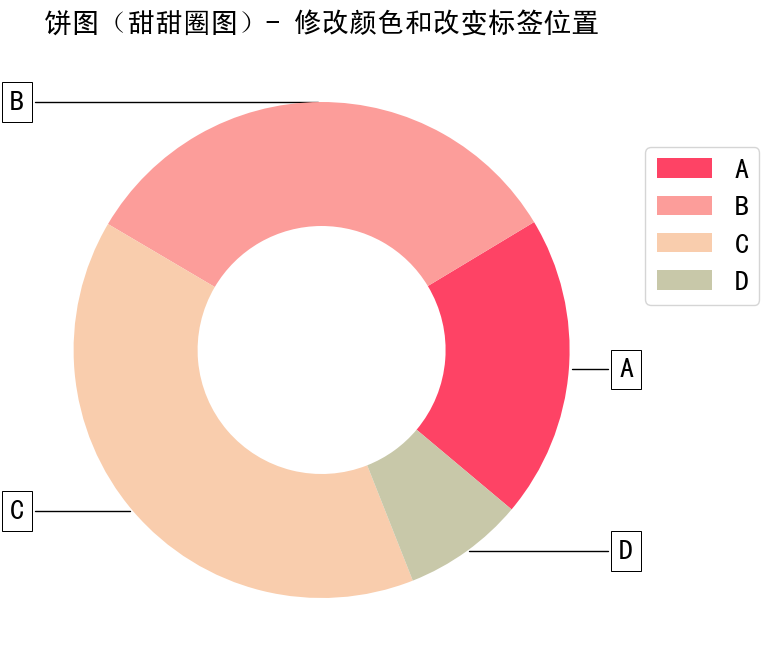

In [4]:
#fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

plt.figure(figsize=(8,9),dpi = 100)  
sizes = [150,250,300,60]
labels = ['A','B','C','D'] 

colors = ['#FE4365','#FC9D9A','#F9CDAD','#C8C8A9']

wedges, texts = plt.pie(sizes,colors = colors, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    plt.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x),y),
                horizontalalignment=horizontalalignment,fontsize = 20,**kw)
    
plt.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0.2, 1, 1),
          fontsize=20)

plt.title("饼图（甜甜圈图）- 修改颜色和改变标签位置",fontsize = 20) 
plt.show()


### 嵌套饼图

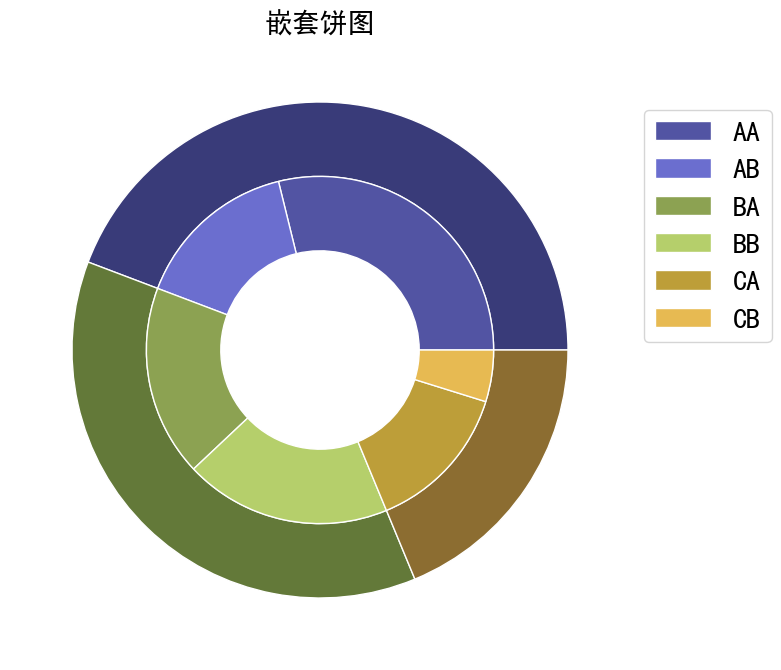

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplots(figsize=(8,9),dpi = 100)

size = 0.3  #内外圆心的比例
vals = np.array([[60., 32.], [37., 40.], [29., 10.]]) 

labels1 = ['A','B','C']
labels2 = ['AA','AB','BA','BB','CA','CB']

cmap = plt.get_cmap("tab20b")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

wedges1, text1 = plt.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

wedges2, text2 = plt.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

plt.legend(wedges2, labels2,
          loc="center left",
          bbox_to_anchor=(1, 0.2, 1, 1),
          fontsize=20)


plt.title("嵌套饼图",fontsize = 20)
plt.savefig("C_06.png")
plt.show()
